Sundus Seif 

## Forced Displacement Population

#### Data collecetd from UNHCR (The UN Refugee Agency): 
http://popstats.unhcr.org/en/persons_of_concern

In [630]:
#raw data
import pandas as pd

df= pd.read_csv(r"unhcr_popstats_export_persons_of_concern_all_data.csv", encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (3,4,5,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [563]:
#libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [564]:
df

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,"China, Hong Kong SAR",Various/Unknown,30000,NaN,NaN,NaN,NaN,NaN,NaN,30000
...,...,...,...,...,...,...,...,...,...,...,...
138783,2018,Zimbabwe,South Sudan,8,NaN,NaN,NaN,NaN,NaN,NaN,8
138784,2018,Zimbabwe,Uganda,7,*,NaN,NaN,NaN,NaN,NaN,10
138785,2018,Zimbabwe,South Africa,NaN,*,NaN,NaN,NaN,NaN,5,7
138786,2018,Zimbabwe,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,*,*


## UNHCR Types of forcibly displaced persons

#### Refugees
A refugee is someone who fled his or her home and country owing to “a well-founded fear of persecution because of his/her race, religion, nationality, membership in a particular social group, or political opinion”, according to the United Nations 1951 Refugee Convention. Many refugees are in exile to escape the effects of natural or human-made disasters.


#### Asylum Seekers

Asylum seekers say they are refugees and have fled their homes as refugees do, but their claim to refugee status is not yet definitively evaluated in the country to which they fled.

Someone who flees their home country due to war or any danger towards them or their family, enters another country and applies for asylum, i.e. the right to international protection, in another country.

#### Internally displaced person (IDP)

Internally Displaced Persons (IDPs) are people who have not crossed an international border but have moved to a different region than the one they call home within their own country.

Someone who is forced to flee his or her home but who remains within his or her country's borders. They are often referred to as refugees, although they do not fall within the legal definitions of a refugee.

#### Stateless person 

Stateless persons do not have a recognized nationality and do not belong to any country.

Statelessness situations are usually caused by discrimination against certain groups. Their lack of identification — a citizenship certificate — can exclude them from access to important government services, including health care, education or employment.

In international law is someone who is "not considered as a national by any state under the operation of its law". Some stateless people are also refugees. However, not all refugees are stateless, and many people who are stateless have never crossed an international border.


#### Returnees

Returnees are former refugees who return to their own countries or regions of origin after time in exile. Returnees need continuous support and reintegration assistance to ensure that they can rebuild their lives at home.


In [565]:
#clean data

#replace * with nan
df= df.replace('*',np.nan)
#convert na to 0
df=df.fillna(0)
#convert to float
#rename columns
df=df.rename(columns={'Year':'year',
                'Country / territory of asylum/residence':'asylum/residence_country',
                   'Origin':'origin_country',
                   'Refugees (incl. refugee-like situations)':'refugees',
                   'Asylum-seekers (pending cases)':'asylum(pending-cases)',
                   'Returned refugees':'returned_refugees',
                   'Internally displaced persons (IDPs)':'internally_displaced_persons(IDPs)',
                   'Returned IDPs':'returned_IDPs',
                   'Stateless persons':'stateless_persons',
                   'Others of concern':'others_of_concern',
                   'Total Population':'total_population'
    })

df[['refugees','asylum(pending-cases)','returned_refugees','internally_displaced_persons(IDPs)','returned_IDPs','stateless_persons','others_of_concern','total_population']]=df[['refugees','asylum(pending-cases)','returned_refugees','internally_displaced_persons(IDPs)','returned_IDPs','stateless_persons','others_of_concern','total_population']].astype(float)
df


,year,asylum/residence_country,origin_country,refugees,asylum(pending-cases),returned_refugees,internally_displaced_persons(IDPs),returned_IDPs,stateless_persons,others_of_concern,total_population
0,1951,Australia,Various/Unknown,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,180000.0
1,1951,Austria,Various/Unknown,282000.0,0.0,0.0,0.0,0.0,0.0,0.0,282000.0
2,1951,Belgium,Various/Unknown,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,55000.0
3,1951,Canada,Various/Unknown,168511.0,0.0,0.0,0.0,0.0,0.0,0.0,168511.0
4,1951,"China, Hong Kong SAR",Various/Unknown,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...
138783,2018,Zimbabwe,South Sudan,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
138784,2018,Zimbabwe,Uganda,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
138785,2018,Zimbabwe,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0
138786,2018,Zimbabwe,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [396]:
#pd.to_datetime(df['year'],format='%Y', errors='ignore')

## Forcibly displaced persons data per country as of 2018 


In [566]:
# the sum of total population displaced in 2018
df_2018=df[df["year"] == 2018]
df_2018= df_2018.groupby("origin_country")["refugees","asylum(pending-cases)","returned_refugees","internally_displaced_persons(IDPs)","returned_IDPs","stateless_persons","others_of_concern","total_population"].sum().reset_index()
df_2018["total_displaced"]=df_2018["refugees"]+df_2018["asylum(pending-cases)"]+df_2018["internally_displaced_persons(IDPs)"]+df_2018["stateless_persons"]+df_2018["others_of_concern"]
df_2018



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,origin_country,refugees,asylum(pending-cases),returned_refugees,internally_displaced_persons(IDPs),returned_IDPs,stateless_persons,others_of_concern,total_population,total_displaced
0,Afghanistan,2681232.0,310094.0,16220.0,2106893.0,73527.0,0.0,489859.0,5677872.0,5588078.0
1,Albania,13507.0,21066.0,0.0,0.0,0.0,0.0,0.0,34582.0,34573.0
2,Algeria,4156.0,7419.0,0.0,0.0,0.0,0.0,11.0,11631.0,11586.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,8213.0,8894.0,0.0,0.0,0.0,0.0,18020.0,35147.0,35127.0
...,...,...,...,...,...,...,...,...,...,...
206,Viet Nam,334444.0,5560.0,0.0,0.0,0.0,0.0,68.0,340097.0,340072.0
207,Western Sahara,116786.0,1799.0,0.0,0.0,0.0,0.0,0.0,118589.0,118585.0
208,Yemen,31120.0,35844.0,0.0,2144718.0,133600.0,0.0,0.0,2345338.0,2211682.0
209,Zambia,256.0,253.0,0.0,0.0,0.0,0.0,0.0,517.0,509.0


In [502]:
### TEST AREA ###
test=top_50[:10]
add_sudan=pd.DataFrame({"origin_country":"Sudan_",
                 "total_displaced": [6980490]
                  })
test =test.append(add_sudan, ignore_index=False)
test = test.drop(4)
test = test.drop(8)
test.sort_values("total_displaced", ascending=False)
###South Sudan	4322299.0
###Sudan	2658191.0




### TEST AREA ###

,origin_country,total_displaced
0,Syrian Arab Rep.,12986246.0
1,Colombia,8000699.0
0,Sudan_,6980490.0
2,Afghanistan,5588078.0
3,Dem. Rep. of the Congo,5381400.0
5,Somalia,3653557.0
6,Venezuela (Bolivarian Republic of),3078183.0
7,Ethiopia,2845440.0
9,Nigeria,2530735.0


In [540]:
# top 50 list as of 2018 
#df2=df[df["year"] == 2018]
top_= df_2018.groupby("origin_country")["total_displaced"].sum().sort_values(ascending=False).reset_index()
top_=top_.set_index("origin_country").drop("Stateless", axis=0).reset_index()

top_[:50]





,origin_country,total_displaced
0,Syrian Arab Rep.,12986246.0
1,Colombia,8000699.0
2,Afghanistan,5588078.0
3,Dem. Rep. of the Congo,5381400.0
4,South Sudan,4186110.0
5,Somalia,3653557.0
6,Venezuela (Bolivarian Republic of),3078183.0
7,Ethiopia,2845440.0
8,Sudan,2656322.0
9,Nigeria,2530735.0


In [541]:
#top 10 list as of 2018

import plotly
from plotly.graph_objs import Figure, Histogram, Layout
from plotly.graph_objs import Bar


top_10=top_[:10]
print(top_10)

data = [Bar(x=top_10['origin_country'],
            y=top_10['total_displaced'],
            text=top_10['origin_country'])]

layout = Layout(title="Total Displaced Persons From Top 10 Countries")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)




                       origin_country  total_displaced
0                    Syrian Arab Rep.       12986246.0
1                            Colombia        8000699.0
2                         Afghanistan        5588078.0
3              Dem. Rep. of the Congo        5381400.0
4                         South Sudan        4186110.0
5                             Somalia        3653557.0
6  Venezuela (Bolivarian Republic of)        3078183.0
7                            Ethiopia        2845440.0
8                               Sudan        2656322.0
9                             Nigeria        2530735.0


In [533]:
df3

,year,asylum/residence_country,origin_country,refugees,asylum(pending-cases),returned_refugees,internally_displaced_persons(IDPs),returned_IDPs,stateless_persons,others_of_concern,total_population
23071,2000,Afghanistan,Afghanistan,0.0,0.0,0.0,758625.0,0.0,0.0,0.0,758625.0
23072,2000,Afghanistan,India,0.0,0.0,19.0,0.0,0.0,0.0,0.0,19.0
23073,2000,Afghanistan,Iraq,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
23074,2000,Afghanistan,Tajikistan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23075,2000,Afghanistan,Turkey,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
138783,2018,Zimbabwe,South Sudan,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
138784,2018,Zimbabwe,Uganda,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
138785,2018,Zimbabwe,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0
138786,2018,Zimbabwe,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Population')

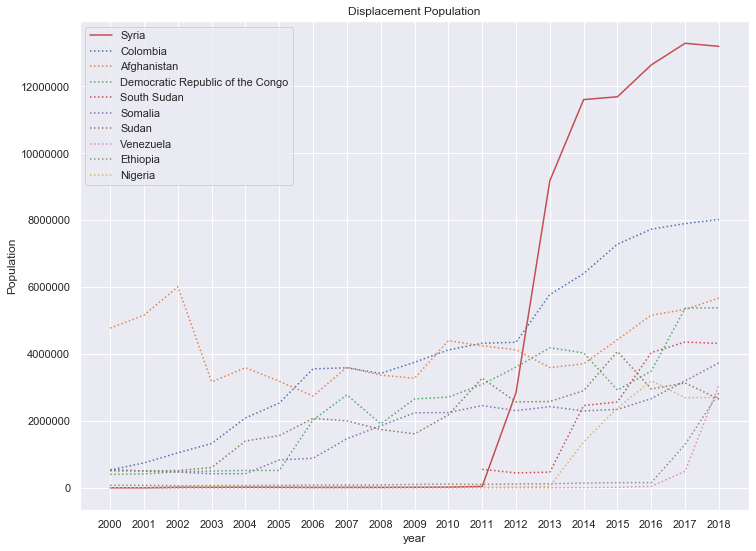

In [549]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


fig = plt.figure(figsize = (12,9))
grid_size = (3,2)


fig.text(x=0.8, y=0.95, s='',color='#524939')

# Overlay multiple plots onto the same axis, which spans 1 entire column of the figure
ax = plt.subplot2grid(grid_size, (0,0), colspan=2, rowspan=3)

df3=df[df["year"] >= 2000]

df3["year"]=df3["year"].apply(int)

#filter Syria 
syria=df3.loc[df3.origin_country=='Syrian Arab Rep.'].groupby("year")[["total_population"]].agg("sum")
syria=syria.rename(columns={'total_population':'Syria'})
syria.plot(ax=ax,
    legend=True, color=['r'], title="Displacement Population")


#filter Colombia 
colombia=df3.loc[df3.origin_country=='Colombia'].groupby("year")[["total_population"]].agg("sum")
colombia=colombia.rename(columns={'total_population':'Colombia'})
colombia.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Afghanistan  
afghanistan=df3.loc[df3.origin_country=='Afghanistan'].groupby("year")[["total_population"]].agg("sum")
afghanistan=afghanistan.rename(columns={'total_population':'Afghanistan'})
afghanistan.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Congo
congo =df3.loc[df3.origin_country=='Dem. Rep. of the Congo'].groupby("year")[["total_population"]].agg("sum")
congo=congo.rename(columns={'total_population':'Democratic Republic of the Congo'})
congo.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter South Sudan

sudan=df3.loc[df3.origin_country=='South Sudan'].groupby("year")[["total_population"]].agg("sum")
sudan=sudan.rename(columns={'total_population':'South Sudan'})
sudan.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Somalia
somalia =df3.loc[df3.origin_country=='Somalia'].groupby("year")[["total_population"]].agg("sum")
somalia=somalia.rename(columns={'total_population':'Somalia'})
somalia.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Sudan
iraq =df3.loc[df3.origin_country=='Sudan'].groupby("year")[["total_population"]].agg("sum")
iraq=iraq.rename(columns={'total_population':'Sudan'})
iraq.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Venezuela
iraq =df3.loc[df3.origin_country=='Venezuela (Bolivarian Republic of)'].groupby("year")[["total_population"]].agg("sum")
iraq=iraq.rename(columns={'total_population':'Venezuela'})
iraq.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Ethiopia
ethiopia=df3.loc[df3.origin_country=='Ethiopia'].groupby("year")[["total_population"]].agg("sum")
ethiopia=ethiopia.rename(columns={'total_population':'Ethiopia'})
ethiopia.plot(ax=ax, linestyle='dotted',
    legend=True)


#filter Nigeria
nigeria=df3.loc[df3.origin_country=='Nigeria'].groupby("year")[["total_population"]].agg("sum")
nigeria=nigeria.rename(columns={'total_population':'Nigeria'})
nigeria.plot(ax=ax, linestyle='dotted',
    legend=True)

plt.xticks(range(2000,2019))
plt.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Population')



## Observing Syrian Refugee Crisis 


In [584]:
#filter syria 

syria=df.loc[df.origin_country=='Syrian Arab Rep.']
syria=syria[syria["year"] >= 2000]
syria["total_displaced"]=syria["refugees"]+syria["asylum(pending-cases)"]+syria["internally_displaced_persons(IDPs)"]+syria["stateless_persons"]+syria["others_of_concern"]

group_year=syria.groupby("year").agg("sum")
group_year[11:]



,refugees,asylum(pending-cases),returned_refugees,internally_displaced_persons(IDPs),returned_IDPs,stateless_persons,others_of_concern,total_population,total_displaced
year,,,,,,,,,
2011,19931.0,14456.0,0.0,0.0,0.0,0.0,14110.0,48497.0,48497.0
2012,729022.0,26023.0,68573.0,2016500.0,0.0,0.0,6900.0,2847018.0,2778445.0
2013,2468332.0,41037.0,140761.0,6520800.0,0.0,0.0,9400.0,9180330.0,9039569.0
2014,3887491.0,84542.0,0.0,7632500.0,0.0,0.0,1993.0,11606526.0,11606526.0
2015,4873243.0,245857.0,189.0,6563462.0,0.0,0.0,8247.0,11690998.0,11690809.0
2016,5524377.0,184218.0,1.0,6325978.0,600000.0,0.0,8518.0,12643092.0,12043091.0
2017,6308623.0,146721.0,77212.0,6150005.0,597152.0,0.0,8596.0,13288334.0,12613945.0
2018,6654339.0,139534.0,210947.0,6183920.0,0.0,0.0,8453.0,13197248.0,12986246.0


### Increase since the start of the civil war 2011  

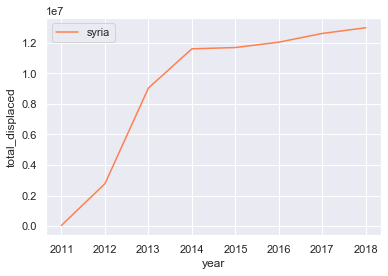

In [602]:
## seaborn.lineplot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

line_=syria.groupby("year")["total_displaced"].sum().reset_index()[11:]
ax = sns.lineplot(x="year", y="total_displaced", data= line_,color="coral", label="syria",)


In [629]:
#interactive line plot 

import plotly.express as px

line_=syria.groupby("year")["total_displaced"].sum().reset_index()[11:]


fig = px.line(line_, x="year", y="total_displaced", title='Rise of Syrian Displaced People')


fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Displaced",
    font=dict(
        family="sans-serif",
        size=12,
        color="black"
    )
)

fig.show()





In [548]:
## pie graph comparing types displaced persons from syria


from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.express as px
import plotly.graph_objs as go

pie=syria[syria["year"] == 2018].groupby("year")["refugees","asylum(pending-cases)","internally_displaced_persons(IDPs)","stateless_persons","others_of_concern", "returned_refugees","returned_IDPs","returned_IDPs","total_population"].sum()

displaced=["refugees","asylum(pending-cases)","internally_displaced_persons(IDPs)","stateless_persons","others_of_concern", "returned_refugees","returned_IDPs"]
totals = [6654339.0,139534.0,6183920.0,0.0,8453.0,210947.0,0.0]
percent=list(map(lambda x: x/13197248.0, totals))

data1 = {
   "values": totals,
   "labels": displaced,
   "domain": {"column": 0},
   "name": "displaced",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}


data = [data1]
layout = go.Layout(
   {
      "title":"Displaced population",
      "grid": {"rows": 1, "columns": 1},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "Syria",
            "x": 0.5,
            "y": 0.5
         }
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)



pie


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,refugees,asylum(pending-cases),internally_displaced_persons(IDPs),stateless_persons,others_of_concern,returned_refugees,returned_IDPs,returned_IDPs,total_population
year,,,,,,,,,
2018,6654339.0,139534.0,6183920.0,0.0,8453.0,210947.0,0.0,0.0,13197248.0


# Syrian refugees residing in different countries

In [580]:
syria=df.loc[df.origin_country=='Syrian Arab Rep.']
syria["total_displaced"]=syria["refugees"]+syria["asylum(pending-cases)"]+syria["internally_displaced_persons(IDPs)"]+syria["stateless_persons"]+syria["others_of_concern"]
syria=syria[syria["year"] == 2018]
syria_asylum=syria.groupby("asylum/residence_country")["total_displaced"].sum().sort_values(ascending=False).reset_index()[1:51]
syria_asylum.rename(columns={"asylum/residence_country": "Country / Territory of Asylum/Residence", "total_displaced": "Total Displaced"})



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country / Territory of Asylum/Residence,Total Displaced
1,Turkey,3622478.0
2,Lebanon,946219.0
3,Jordan,676283.0
4,Germany,584461.0
5,Iraq,252526.0
6,Egypt,132871.0
7,Sweden,111696.0
8,Sudan,93502.0
9,Austria,50717.0
10,Greece,38035.0


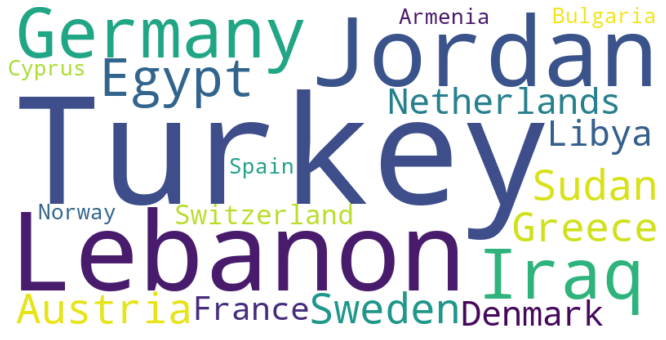

In [578]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
import matplotlib.pyplot as plt
%matplotlib inline

# generate word cloud syria_asylum for 20 countries
wc.generate(' '.join(syria_asylum['asylum/residence_country'][0:20]))

# show 
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
